# Parameter Estimation in Dynamical Systems

### Part 1: Simulator

Implement a fixed timestep version of the Dormand-Prince method to solve the Lotka-Volterra equations:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

with $u(0)=[x(0),y(0)]=[1,1], dt=1/4$ on $t \in (1,10)$ with parameters $\alpha = 1.5, \beta = 1.0, \gamma = 3.0, \delta = 1.0$.

#### Ans:

Below we solve the Lotka-Volterra equations using Dormand-Prince method and plot the results. 

We then check our results by using ODEProblem in DifferentialEquations.jl. We can get similar plots as we got using Dormand-Prince method.

In [23]:
using StaticArrays
using DifferentialEquations
using Plots

In [24]:
# question 1
function DPmethod(f,u0,tspan,p,s,a,b,c,dt,dim)   
    t_vec = tspan[1]:dt:tspan[2]
    len_ans = length(t_vec)
    u_vec = Array{Float64}(undef, len_ans, dim)
    u_vec[1,:] = u0
    k = Array{Float64}(undef, s, dim)
    for i in 2:length(t_vec) # 2,3,4,...,41
        u = u_vec[i-1,:]
        k[1,:] = f(u)
        k[2,:] = f(u+a[1]*dt*k[1,:])
        k[3,:] = f(u+a[2]*dt*k[1,:]+a[3]*dt*k[2,:])
        k[4,:] = f(u+a[4]*dt*k[1,:]+a[5]*dt*k[2,:]+a[6]*dt*k[3,:])
        k[5,:] = f(u+a[7]*dt*k[1,:]+a[8]*dt*k[2,:]+a[9]*dt*k[3,:]+a[10]*dt*k[4,:])
        k[6,:] = f(u+a[11]*dt*k[1,:]+a[12]*dt*k[2,:]+a[13]*dt*k[3,:]+a[14]*dt*k[4,:]+a[15]*dt*k[5,:])
        k[7,:] = f(u+a[16]*dt*k[1,:]+a[17]*dt*k[2,:]+a[18]*dt*k[3,:]+a[19]*dt*k[4,:]+a[20]*dt*k[5,:]+a[21]*dt*k[6,:])
        for j in 1:dim
            u_vec[i,j] = u_vec[i-1,j] + dt* sum(b .* k[:,j])
        end
    end
    return t_vec, u_vec
end 

# constatns for DP method
const s = 7
const a = @SVector[
    1/5,
    3/40, 9/40,
    44/45, −56/15, 32/9,
    19372/6561, −25360/2187, 64448/6561, −212/729,
    9017/3168, −355/33, 46732/5247, 49/176, −5103/18656,
    35/384, 0, 500/1113, 125/192, −2187/6784, 11/84,
]
const b = @SVector[35/384, 0, 500/1113, 125/192, −2187/6784, 11/84, 0]
const c = @SVector[0, 1/5, 3/10, 4/5, 8/9, 1, 1]

# arguments for DPmethod
# let u[1]=x, u[2]=y
# let p[1]=alpha, p[2]=beta, p[3]=gamma, p[4]=delta
function f_lotka(u)
    ans = Array{Float64}(undef, 2, 1)
    ans[1] = p[1]*u[1] - p[2]*u[1]*u[2]
    ans[2] = -p[3]*u[2] + p[4]*u[1]*u[2]
    return ans
end
u0 = [1.0, 1.0]
tspan = (0.0,10.0)
p = (1.5,1.0,3.0,1.0)
dt = 1/4
dim = 2

#solve the Lotka-Volterra equations
DP_sol = DPmethod(f_lotka,u0,tspan,p,s,a,b,c,dt,dim)   


(0.0:0.25:10.0, [1.0 1.0; 1.1937858351140629 0.6196175601654369; … ; 0.9394851282999401 1.5236104880830705; 1.0146506702336069 0.9158939184470056])

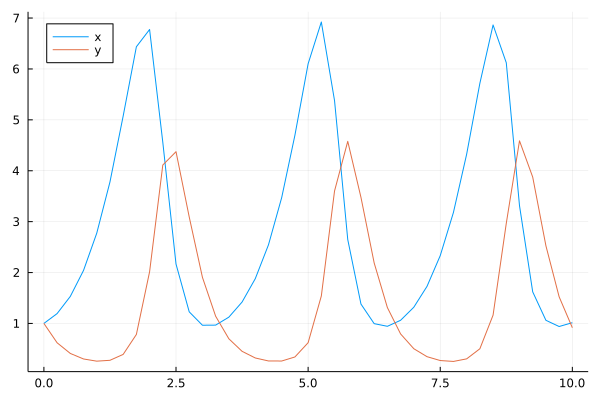

In [25]:
# plot
plot(DP_sol[1], DP_sol[2], legend=:topleft, labels=["x" "y"])

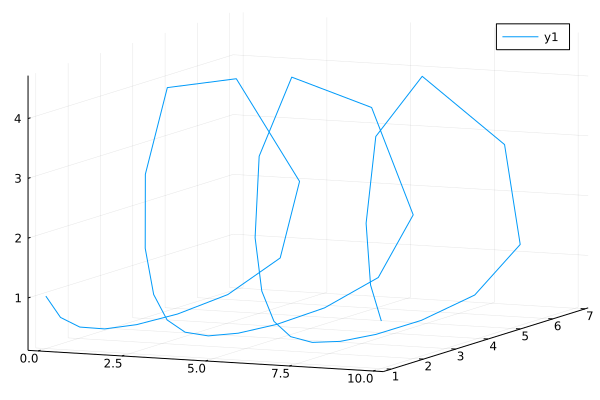

In [26]:
plot(DP_sol[1], DP_sol[2][:,1], DP_sol[2][:,2])

In [27]:
# check using package
function LotkaVolterra(du,u,p,t)
    du[1] = p[1]*u[1] - p[2]*u[1]*u[2]
    du[2] = -p[3]*u[2] + p[4]*u[1]*u[2]
end

u0 = [1.0, 1.0]
tspan = (0.0,10.0)
p = (1.5,1.0,3.0,1.0)

prob = ODEProblem(LotkaVolterra,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 34-element Vector{Float64}:
  0.0
  0.0776084743154256
  0.23264513699277584
  0.4291185174543143
  0.6790821987497083
  0.9444046158046306
  1.2674601546021105
  1.6192913303893046
  1.9869754683103642
  2.2640902839813197
  2.5125485204162454
  2.7468281359189572
  3.038006685702111
  ⋮
  6.455762131030591
  6.780496137911642
  7.17104010309727
  7.584863318990435
  7.978068938553126
  8.48316537362806
  8.719248193178336
  8.94920675827678
  9.200185032122443
  9.43802898750867
  9.71180811746407
 10.0
u: 34-element Vector{Vector{Float64}}:
 [1.0, 1.0]
 [1.0454942346944578, 0.8576684823217126]
 [1.175871588513827, 0.6394595703175439]
 [1.4196809607170824, 0.45699626012820815]
 [1.8767193950080001, 0.324733429279113]
 [2.588250064553345, 0.2633625553595212]
 [3.860708909220765, 0.2794458098285246]
 [5.750812667710397, 0.5220072537934528]
 [6.814978

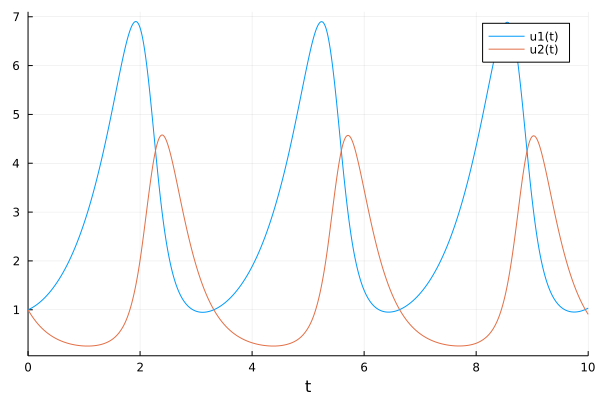

In [28]:
plot(sol)

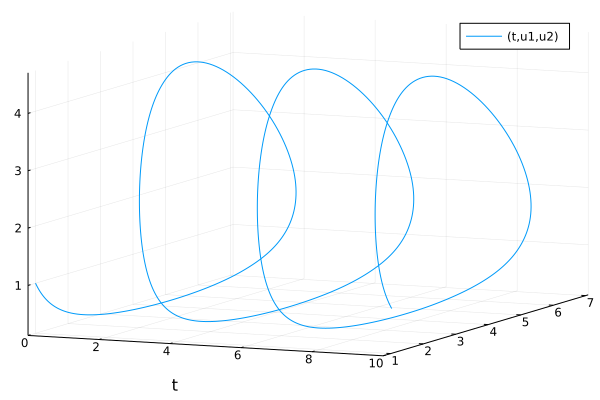

In [29]:
plot(sol,vars=(0,1,2))

### Part 2: Forward Sensitivity Equations

The forward sensitivity equations are derived directly by the chain rule. The forward sensitivity equations are equivalent to the result of forward-mode automatic differentiation on the ODE solver. In this part we will implement the sensitivity equations by hand. Given an ODE:

$$u' = f(u,p,t)$$

The forward sensitivity equations are given by:

$$\frac{d}{dt}(\frac{du}{dp}) = \frac{df}{du} \frac{du}{dp} + \frac{df}{dp}$$

Use this definition to simultaniously solve for the solution to the ODE along with its derivative with respect to parameters.

#### Ans:

$$\frac{d}{dt}(\frac{du}{dp}) = \frac{df}{du} \frac{du}{dp} + \frac{df}{dp}=\frac{d}{dt}\begin{pmatrix} \frac{\partial x}{\partial \alpha} & \frac{\partial x}{\partial \beta} & \frac{\partial x}{\partial \gamma} & \frac{\partial x}{\partial \delta} \\ \frac{\partial y}{\partial \alpha} & \frac{\partial y}{\partial \beta} & \frac{\partial y}{\partial \gamma} & \frac{\partial y}{\partial \delta} \end{pmatrix}$$
$$=\begin{pmatrix} \alpha-\beta y & -\beta x \\ \delta y & -\gamma+\delta x \end{pmatrix} \begin{pmatrix} \frac{\partial x}{\partial \alpha} & \frac{\partial x}{\partial \beta} & \frac{\partial x}{\partial \gamma} & \frac{\partial x}{\partial \delta} \\ \frac{\partial y}{\partial \alpha} & \frac{\partial y}{\partial \beta} & \frac{\partial y}{\partial \gamma} & \frac{\partial y}{\partial \delta} \end{pmatrix} + \begin{pmatrix} x & -xy & 0 & 0 \\ 0 & 0 & -y & xy \end{pmatrix}$$

The ODE we are going to solve is:

$$\frac{d}{dt}\begin{pmatrix} x\\y\\ \frac{\partial x}{\partial \alpha} \\ \frac{\partial x}{\partial \beta} \\ \frac{\partial x}{\partial \gamma} \\ \frac{\partial x}{\partial \delta}  \\ \frac{\partial y}{\partial \alpha} \\ \frac{\partial y}{\partial \beta} \\ \frac{\partial y}{\partial \gamma} \\ \frac{\partial y}{\partial \delta} \end{pmatrix} = \begin{pmatrix} \alpha x - \beta xy \\ -\gamma y + \delta xy \\ (\alpha-\beta y) \frac{\partial x}{\partial \alpha} - \beta x \frac{\partial y}{\partial \alpha} + x \\ (\alpha-\beta y) \frac{\partial x}{\partial \beta} - \beta x \frac{\partial y}{\partial \beta} - xy \\ (\alpha-\beta y) \frac{\partial x}{\partial \gamma} - \beta x \frac{\partial y}{\partial \gamma} \\ (\alpha-\beta y) \frac{\partial x}{\partial \delta} - \beta x \frac{\partial y}{\partial \delta} \\ \delta y \frac{\partial x}{\partial \alpha} + (-\gamma+\delta x) \frac{\partial y}{\partial \alpha} \\ \delta y \frac{\partial x}{\partial \beta} + (-\gamma+\delta x) \frac{\partial y}{\partial \beta} \\ \delta y \frac{\partial x}{\partial \gamma} + (-\gamma+\delta x) \frac{\partial y}{\partial \gamma} - y \\ \delta y \frac{\partial x}{\partial \delta} + (-\gamma+\delta x) \frac{\partial y}{\partial \delta} + xy \end{pmatrix} $$

Here we extend the ODE into 10 variables. Below, we solve the ODE using Dormand-Prince method, and plot our solutions to the Lotka-Volterra equations and also its derivative with respect to parameters.

In [30]:
# question 2
# let u[1]=x, u[2]=y
# u[3]=∂x/∂α, u[4]=∂x/∂β, u[5]=∂x/∂γ, u[6]=∂x/∂δ
# u[7]=∂y/∂α, u[8]=∂y/∂β, u[9]=∂y/∂γ, u[10]=∂y/∂δ
# let p[1]=alpha, p[2]=beta, p[3]=gamma, p[4]=delta

# arguments for DPmethod
function f_lotka2(u)
    ans = Array{Float64}(undef, 10, 1)
    ans[1] = p[1]*u[1] - p[2]*u[1]*u[2]
    ans[2] = -p[3]*u[2] + p[4]*u[1]*u[2]
    ans[3] = (p[1]-p[2]*u[2])*u[3] - p[2]*u[1]*u[7] + u[1]
    ans[4] = (p[1]-p[2]*u[2])*u[4] - p[2]*u[1]*u[8] - u[1]*u[2]
    ans[5] = (p[1]-p[2]*u[2])*u[5] - p[2]*u[1]*u[9]
    ans[6] = (p[1]-p[2]*u[2])*u[6] - p[2]*u[1]*u[10]
    ans[7] = p[4]*u[2]*u[3] + (-p[3]+p[4]*u[1])*u[7]
    ans[8] = p[4]*u[2]*u[4] + (-p[3]+p[4]*u[1])*u[8]
    ans[9] = p[4]*u[2]*u[5] + (-p[3]+p[4]*u[1])*u[9] - u[2]
    ans[10] = p[4]*u[2]*u[6] + (-p[3]+p[4]*u[1])*u[10] + u[1]*u[2]
    return ans
end

u0 = [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
tspan = (0.0,10.0)
p = (1.5,1.0,3.0,1.0)
dt = 1/4
dim = 10

DP_sol = DPmethod(f_lotka2,u0,tspan,p,s,a,b,c,dt,dim)  


(0.0:0.25:10.0, [1.0 1.0 … 0.0 0.0; 1.1937858351140629 0.6196175601654369 … -0.15349939286121098 0.16667096940600054; … ; 0.9394851282999401 1.5236104880830705 … -2.531667178215378 -5.444847878183511; 1.0146506702336069 0.9158939184470056 … -1.7085823486841396 -2.9582477293919895])

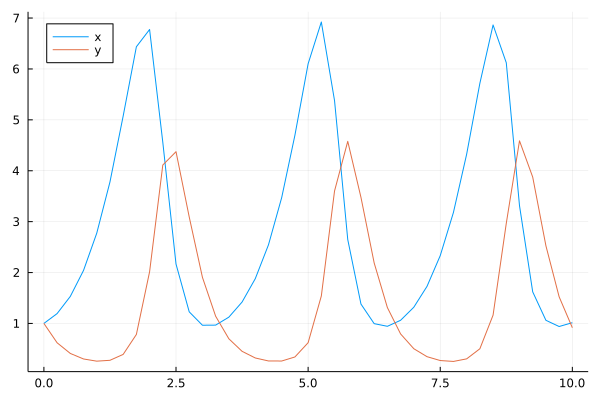

In [31]:
plot(DP_sol[1], DP_sol[2][:,1:2], legend=:topleft, labels=["x" "y"])

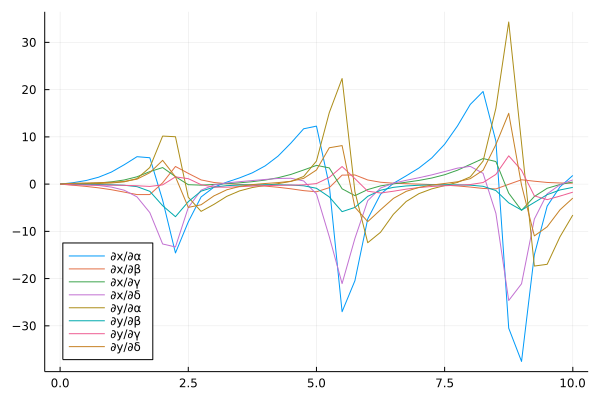

In [32]:
plot(DP_sol[1], DP_sol[2][:,3:10], legend=:bottomleft, labels=["∂x/∂α" "∂x/∂β" "∂x/∂γ" "∂x/∂δ" "∂y/∂α" "∂y/∂β" "∂y/∂γ" "∂y/∂δ"])

### Part 3: Parameter Estimation

Generate data using the parameters from Part 1. Then perturb the parameters to start at $\alpha = 1.2, \beta = 0.8, \gamma = 2.8, \delta = 0.8$. Use the L2 loss against the data as a cost function, and use the forward sensitivity equations to implement gradient descent and optimize the cost function to retreive the true parameters.

#### Ans:

The loss function we are trying to minimize is
$$L(u) =  \sum_{i}\lVert u(t_i) - \hat{u}(t_i) \rVert^2 = \sum_{i}\lVert \begin{pmatrix} x_i-\hat{x_i} \\ y_i-\hat{y_i} \end{pmatrix} \rVert^2 = \sum_{i} (x_i-\hat{x_i})^2 + (y_i-\hat{y_i})^2$$

Using the chain rule, we get the gradient w.r.t. the parameters $\alpha, \beta, \gamma, \delta$


$$\begin{bmatrix} \frac{\partial L}{\partial \alpha} & \frac{\partial L}{\partial \beta} & \frac{\partial L}{\partial \gamma} & \frac{\partial L}{\partial \delta} \end{bmatrix} = \frac{\partial L}{\partial p} = \sum_{i} \frac{\partial L}{\partial u(t_i)} \frac{\partial u(t_i)}{\partial p}$$
$$=\sum_{i} \begin{bmatrix} \frac{\partial L}{\partial x_i} & \frac{\partial L}{\partial y_i} \end{bmatrix} \begin{bmatrix} \frac{\partial x_i}{\partial \alpha} & \frac{\partial x_i}{\partial \beta} & \frac{\partial x_i}{\partial \gamma} & \frac{\partial x_i}{\partial \delta} \\ \frac{\partial y_i}{\partial \alpha} & \frac{\partial y_i}{\partial \beta} & \frac{\partial y_i}{\partial \gamma} & \frac{\partial y_i}{\partial \delta} \end{bmatrix}$$

The process of gradient descent can be written as
$$p_{n+1} = p_n -\eta\frac{\partial L}{\partial p} $$

Or more explicitly,
$$\begin{cases} \alpha_{n+1} = \alpha_n - \eta \frac{\partial L}{\partial \alpha} \\ \beta_{n+1} = \beta_n - \eta \frac{\partial L}{\partial \beta} \\ \gamma_{n+1} = \gamma_n - \eta \frac{\partial L}{\partial \gamma} \\ \delta_{n+1} = \delta_n - \eta \frac{\partial L}{\partial \delta} \end{cases}$$

Using the learning rate $\eta = 0.0001$, we can retreive the true parameters in 8771 iterations. We can also plot the evoluation of loss function and the four parameters. In the end, the value of loss function is close to 0, and the values of the four parameters are close to the true parameters.

In [33]:
# question 3
# get u_hat(ti)
u0 = [1.0, 1.0]
tspan = (0.0,10.0)
p = (1.5,1.0,3.0,1.0)
dt = 1/4
dim = 2
DP_sol = DPmethod(f_lotka,u0,tspan,p,s,a,b,c,dt,dim)   
u_hat_t = DP_sol[2]

# gradient descent
u0 = [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
tspan = (0.0,10.0)
p = reshape([1.2,0.8,2.8,0.8],1,4)
dt = 1/4
dim = 10

function cal_loss(u_t, u_hat_t)
    return sum((u_t[:,1] - u_hat_t[:,1]) .^ 2) + sum((u_t[:,2] - u_hat_t[:,2]) .^ 2)
end

loss = 100
iter = 0
loss_vec = zeros(0)
alpha_vec = zeros(0)
beta_vec = zeros(0)
gamma_vec = zeros(0)
delta_vec = zeros(0)
append!(alpha_vec, p[1])
append!(beta_vec, p[2])
append!(gamma_vec, p[3])
append!(delta_vec, p[4])

while loss > sqrt(eps()) || iter > 100000
    DP_sol = DPmethod(f_lotka2,u0,tspan,p,s,a,b,c,dt,dim)   
    u_t = DP_sol[2][:,1:2]
    du_dp = DP_sol[2][:,3:10]

    dL_dp = zeros(1,4)
    for i in 1:41
        dL_du_ti = reshape(DP_sol[2][i,1:2] - u_hat_t[i,:], 1, 2)
        du_ti_dp = reshape(DP_sol[2][i,3:10],4,2) |> transpose
        dL_dp = dL_dp + dL_du_ti * du_ti_dp
    end

    rate = 0.0001
    p = p - rate * dL_dp
    
    loss = cal_loss(u_t, u_hat_t)
    append!(loss_vec, loss)
    append!(alpha_vec, p[1])
    append!(beta_vec, p[2])
    append!(gamma_vec, p[3])
    append!(delta_vec, p[4])
    iter = iter + 1
end


In [34]:
# result
print("p = ", p, "\n")
print("loss = ", loss, "\n")
print("iteration = ", iter)

p = [1.5000120257985394 1.0000074236296026 2.9999641998759663 0.9999873946005028]
loss = 1.4878021770672301e-8
iteration = 8771

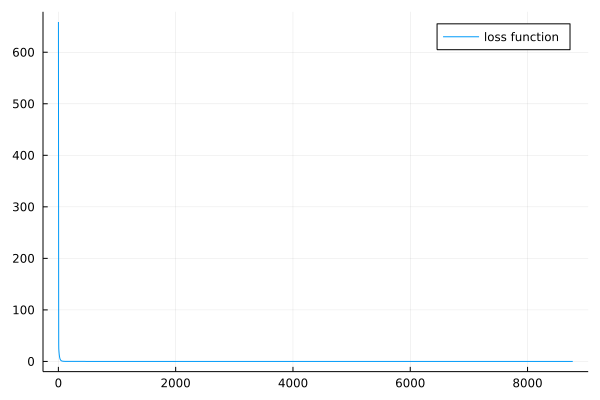

In [35]:
plot(1:length(loss_vec),(loss_vec), legend=:topright, labels="loss function")

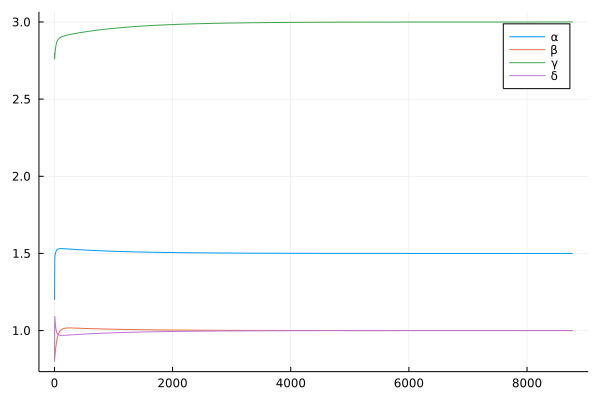

In [36]:
plot(1:length(alpha_vec),[alpha_vec,beta_vec,gamma_vec,delta_vec],labels=["α" "β" "γ" "δ"])